In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2
from IPython.display import display, Image

In [2]:

test_image_path = "src/3d_photo.jpg"
court_img = cv2.imread(test_image_path)
if court_img is not None:
    image_shape = court_img.shape
    print("Shape of the actual image:", image_shape)
else:
    print("Failed to load the imageß")
          
# resized the court image to 640x480
court_img = cv2.resize(court_img, (700, 400))
    
# Display the resized image using IPython display
# display(Image(data=cv2.imencode('.jpg', court_img)[1]))


Shape of the actual image: (720, 1282, 3)


In [3]:
top_view_img_path = "src/top_view_court_img.png"
top_view_img = cv2.imread(top_view_img_path)

if court_img is not None:
    image_shape = top_view_img.shape
    print("Shape of the actual image:", image_shape)
else:
    print("Failed to load the image from the provided path.")

# resized the court image to 640x480
top_view_img = cv2.resize(top_view_img, (700, 400))
    
# Display the resized image using IPython display
# display(Image(data=cv2.imencode('.jpg', top_view_img)[1]))

Shape of the actual image: (325, 513, 3)


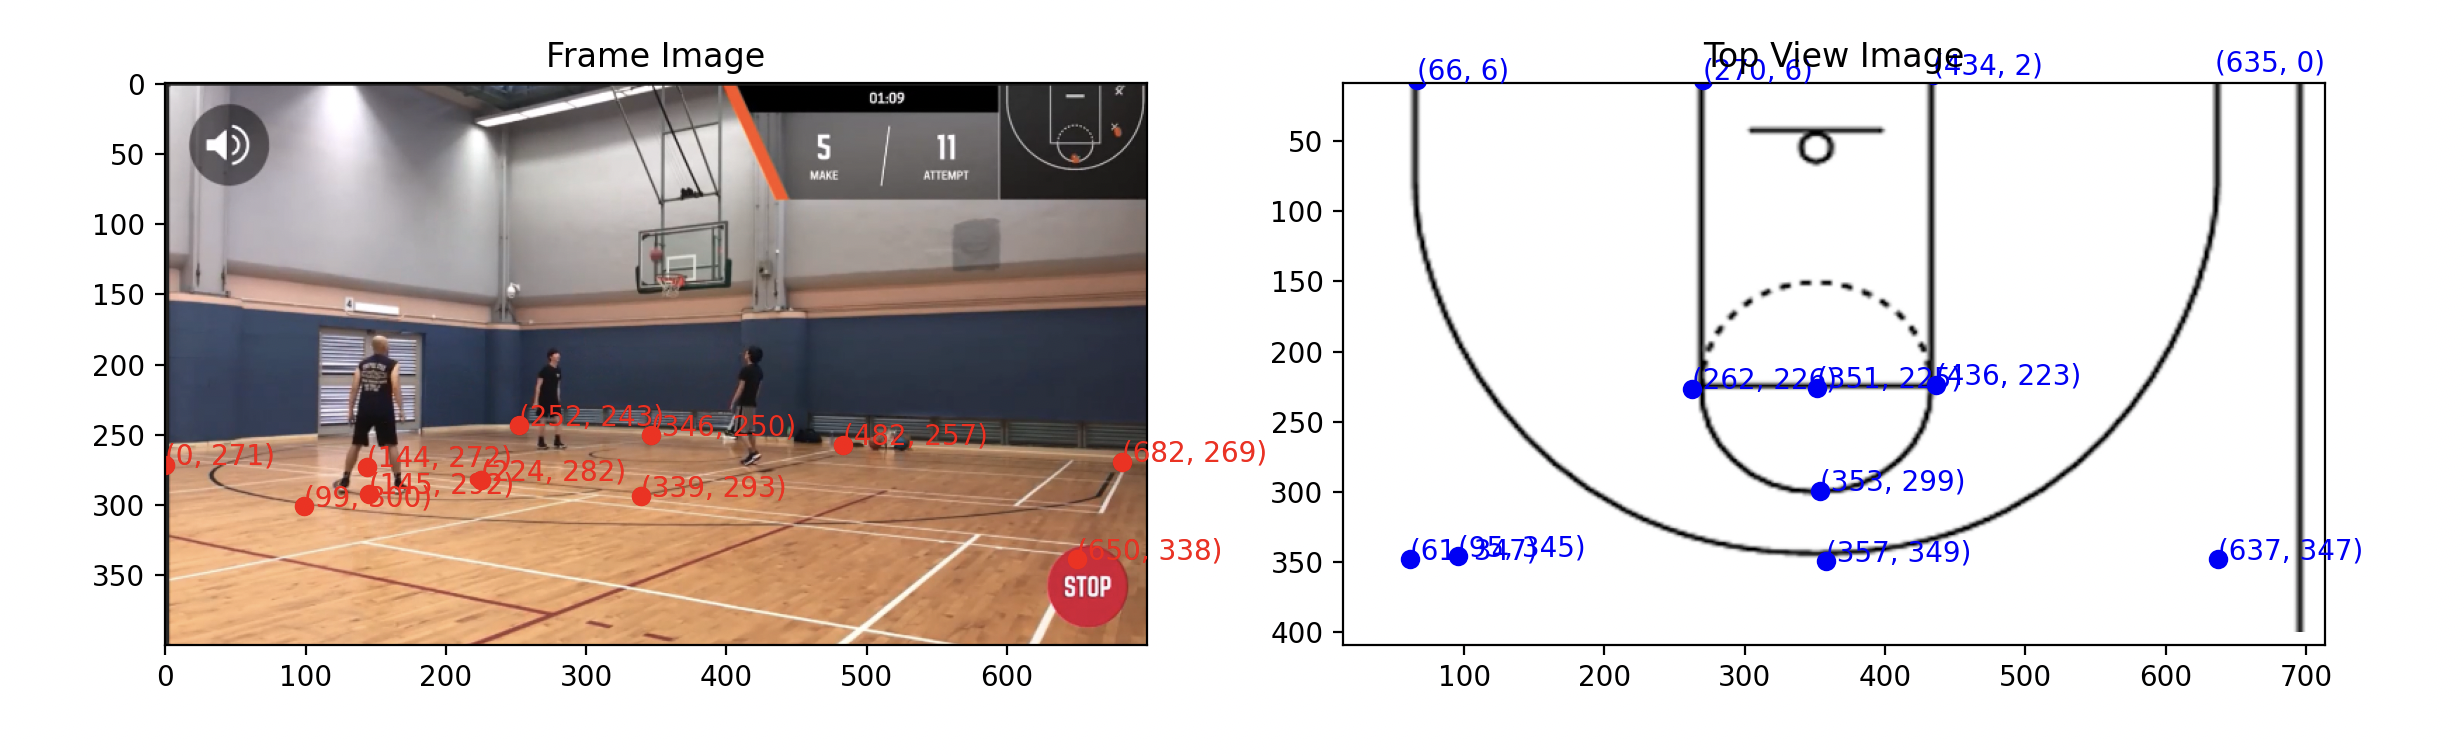

In [4]:
# get coordinate of points from the image
# !python get_points.py
Image(filename='points_mapped.png')

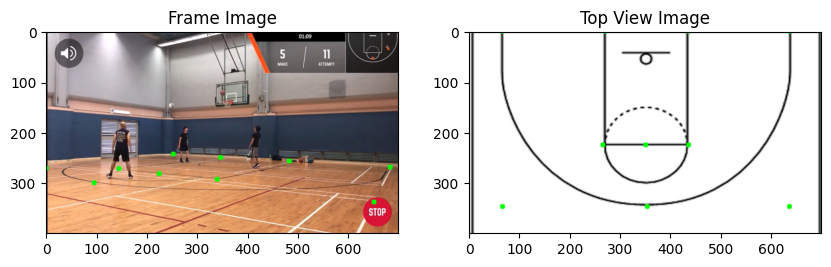

In [5]:

pts_frame =np.array([[252,243],[346,250],[482,257],[682,269],[144,272],[224,282],[339,293],[0,271],[95,300],[650,338]],dtype=np.float32)
pts_top_view = np.array([[66,0],[270,0],[435,0],[635,0],[265,225],[350,225],[435,225],[66,347],[353,347],[635,347]],dtype=np.float32)

#Plot points on the frame image
# Plot points on the frame image
for pt in pts_frame:
    cv2.circle(court_img, (int(pt[0]), int(pt[1])), 5, (0, 255, 0), -1)

# Plot points on the top view image
for pt in pts_top_view:
    cv2.circle(top_view_img, (int(pt[0]), int(pt[1])), 5, (0, 255, 0), -1)

# Display the frame image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(court_img, cv2.COLOR_BGR2RGB))
plt.title('Frame Image')

# Display the top view image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(top_view_img, cv2.COLOR_BGR2RGB))
plt.title('Top View Image')

plt.show()


In [6]:

pts_frame =np.array([[252,243],[346,250],[482,257],[682,269],[144,272],[224,282],[339,293],[0,271],[95,300],[650,338]],dtype=np.float32)
pts_top_view = np.array([[66,0],[270,0],[435,0],[635,0],[265,225],[350,225],[435,225],[66,347],[353,347],[635,347]],dtype=np.float32)

# Compute homography matrix
H, _ = cv2.findHomography(pts_frame, pts_top_view)

# # Warp the frame image to top view
# frame_top_view = cv2.warpPerspective(court_img, H, (top_view_img.shape[1], top_view_img.shape[0]))

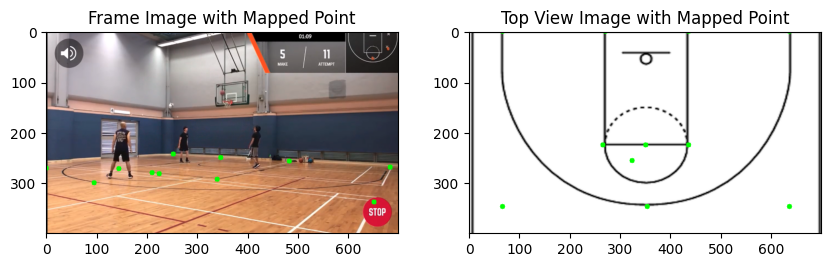

In [7]:
# Define a function to map a point from frame to top view
def map_point_to_top_view(pt):
    pts_frame =np.array([[252,243],[346,250],[482,257],[682,269],[144,272],[224,282],[339,293],[0,271],[95,300],[650,338]],dtype=np.float32)
    pts_top_view = np.array([[66,0],[270,0],[435,0],[635,0],[265,225],[350,225],[435,225],[66,347],[353,347],[635,347]],dtype=np.float32)

    # Compute homography matrix
    H, _ = cv2.findHomography(pts_frame, pts_top_view)
    
    # Map the point to top view
    pt = np.array([pt], dtype=np.float32)
    mapped_pt = cv2.perspectiveTransform(pt.reshape(-1, 1, 2), H)
    return mapped_pt[0][0]

# Map a test point
test_point_frame = (210, 280)  # Example point in the frame
mapped_test_point = map_point_to_top_view(test_point_frame)

# Draw a circle at the mapped point on the frame image
frame_img_mapped = cv2.circle(court_img.copy(), (int(test_point_frame[0]), int(test_point_frame[1])), 5, (0, 255, 0), -1)

# Draw a circle at the mapped point on the top view image
top_view_img_mapped = cv2.circle(top_view_img.copy(), (int(mapped_test_point[0]), int(mapped_test_point[1])), 5, (0, 255, 0), -1)

# Display the frame image with the mapped point
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame_img_mapped, cv2.COLOR_BGR2RGB))
plt.title('Frame Image with Mapped Point')

# Display the top view image with the mapped point
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(top_view_img_mapped, cv2.COLOR_BGR2RGB))
plt.title('Top View Image with Mapped Point')

plt.show()


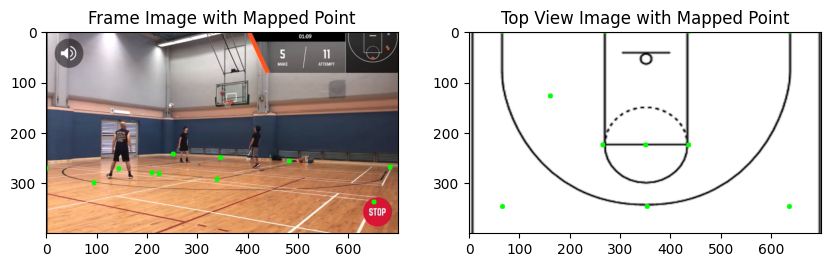

In [8]:
def map_point_to_top_view(pt, scale_factor):
    pts_frame = np.array([[252,243],[346,250],[482,257],[682,269],[144,272],[224,282],[339,293],[0,271],[95,300],[650,338]], dtype=np.float32)
    pts_top_view = np.array([[66,0],[270,0],[435,0],[635,0],[265,225],[350,225],[435,225],[66,347],[353,347],[635,347]], dtype=np.float32)

    # Compute homography matrix
    H, _ = cv2.findHomography(pts_frame, pts_top_view)
    
    # Map the point to top view and scale
    pt = np.array([pt], dtype=np.float32)
    mapped_pt = cv2.perspectiveTransform(pt.reshape(-1, 1, 2), H)
    mapped_pt_scaled = mapped_pt[0][0] * scale_factor

    return mapped_pt_scaled

# Scale factor to shrink the top view graph
scale_factor = 0.5

# Map a test point
test_point_frame = (210, 280)  # Example point in the frame
mapped_test_point = map_point_to_top_view(test_point_frame, scale_factor)

# Draw a circle at the mapped point on the frame image
frame_img_mapped = cv2.circle(court_img.copy(), (int(test_point_frame[0]), int(test_point_frame[1])), 5, (0, 255, 0), -1)

# Draw a circle at the mapped point on the top view image
top_view_img_mapped = cv2.circle(top_view_img.copy(), (int(mapped_test_point[0]), int(mapped_test_point[1])), 5, (0, 255, 0), -1)

# Display the frame image with the mapped point
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame_img_mapped, cv2.COLOR_BGR2RGB))
plt.title('Frame Image with Mapped Point')

# Display the top view image with the mapped point
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(top_view_img_mapped, cv2.COLOR_BGR2RGB))
plt.title('Top View Image with Mapped Point')

plt.show()


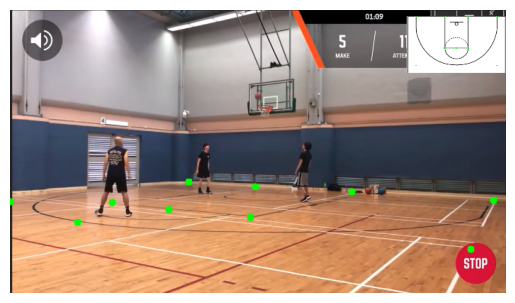

In [9]:
import cv2
import matplotlib.pyplot as plt


# Resize the top view image to a smaller size
resized_top_view = cv2.resize(top_view_img, (140, 80))

# Get the dimensions of the frame and resized top view image
frame_h, frame_w, _ = court_img.shape
top_view_h, top_view_w, _ = resized_top_view.shape

# Overlay the resized top view image onto the frame at the top right corner
court_img[10:10+top_view_h, frame_w-top_view_w:frame_w] = resized_top_view

# Display the frame image with the top view image overlaid
plt.imshow(cv2.cvtColor(court_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


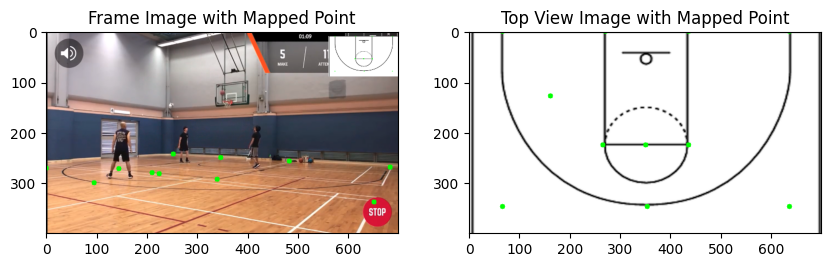

In [10]:
def map_point_to_top_view(pt, scale_factor):
    pts_frame = np.array([[252,243],[346,250],[482,257],[682,269],[144,272],[224,282],[339,293],[0,271],[95,300],[650,338]], dtype=np.float32)
    pts_top_view = np.array([[66,0],[270,0],[435,0],[635,0],[265,225],[350,225],[435,225],[66,347],[353,347],[635,347]], dtype=np.float32)

    # Compute homography matrix
    H, _ = cv2.findHomography(pts_frame, pts_top_view)
    
    # Map the point to top view and scale
    pt = np.array([pt], dtype=np.float32)
    mapped_pt = cv2.perspectiveTransform(pt.reshape(-1, 1, 2), H)
    mapped_pt_scaled = mapped_pt[0][0] * scale_factor

    return mapped_pt_scaled

# Scale factor to shrink the top view graph
scale_factor = 0.5

# Map a test point
test_point_frame = (210, 280)  # Example point in the frame
mapped_test_point = map_point_to_top_view(test_point_frame, scale_factor)

# Draw a circle at the mapped point on the frame image
frame_img_mapped = cv2.circle(court_img.copy(), (int(test_point_frame[0]), int(test_point_frame[1])), 5, (0, 255, 0), -1)

# Draw a circle at the mapped point on the top view image
top_view_img_mapped = cv2.circle(top_view_img.copy(), (int(mapped_test_point[0]), int(mapped_test_point[1])), 5, (0, 255, 0), -1)

# Display the frame image with the mapped point
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame_img_mapped, cv2.COLOR_BGR2RGB))
plt.title('Frame Image with Mapped Point')

# Display the top view image with the mapped point
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(top_view_img_mapped, cv2.COLOR_BGR2RGB))
plt.title('Top View Image with Mapped Point')

plt.show()